# 도파민의 시대: 노래도 짧아졌을까?
##### hi_popularity_spotify_data.csv 
---

# 1. 기초 작업

## 기본 설정

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from seaborn import move_legend

plt.style.use('seaborn-v0_8')

liked = pd.read_csv("high_popularity_spotify_data.csv")
hated = pd.read_csv("low_popularity_spotify_data.csv")

## 간단히 구조 파악·결측치 처리

In [80]:
print(liked.columns)
print(liked.info())
print(liked.duplicated().sum())

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness    

---

# 2. 본격 연구

## 연구 주제: 노래가 짧아졌을까?
- **연도별**로 변화하는 노래의 양상(**길이**).

## 칼럼 선정
- track_popularity: 인기도

- track_album_release_date: 시기

- duration_ms: 노래 길이

In [81]:
# 쓸 칼럼: track_popularity, track_album_release_date, duration_ms
liked = liked.rename(columns={"track_album_release_date": "year"})
liked = liked.rename(columns={"duration_ms": "length"})

pop = "track_popularity"
year = "year"
len = "length"
count = "count"

liked = liked.dropna()

# 전처리
liked[len] = ((((liked[len] / 1000) // 60 ) * 60)/60).astype(int) ##밀리초를 초 단위로 변환 & 1분 단위로 묶기
liked[year] = liked[year].str[:4].astype(int) ## 연도만 남기고 정수로 변환
liked[pop] = ((liked[pop] // 5) * 5).astype(int) ## 인기 점수를 5 단위로 묶기
liked[count] = 1

---


# 3. 시각화 및 검증

## 시각화

- X축: 노래 발매 연도

- Y축: 개수

- 막대: 노래 길이를 색상으로 구분(연할수록 노래 짧음)

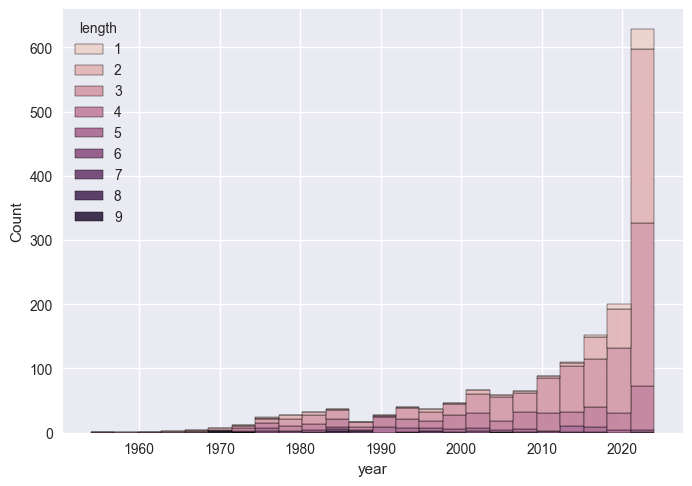

In [82]:
sns.histplot(data = liked, x=year, hue=len, kde=False, stat="count", 
             common_norm=False, multiple="stack", alpha=0.9)
plt.show()

## 문제 개선 및 최종 검증

현재 그래프는 노래 길이의 분포보다 노래 개수를 강조.

- 이유: 연도별 노래 데이터의 개수가 차이가 큼.

- 개선 방안: 막대 그래프의 길이를 통일하여 비율에 집중할 수 있도록 함.

    - 단, 70년 이전의 데이터는 너무 적어 비율로 그래프 제시할 경우 편파될 가능성 높으므로 삭제.


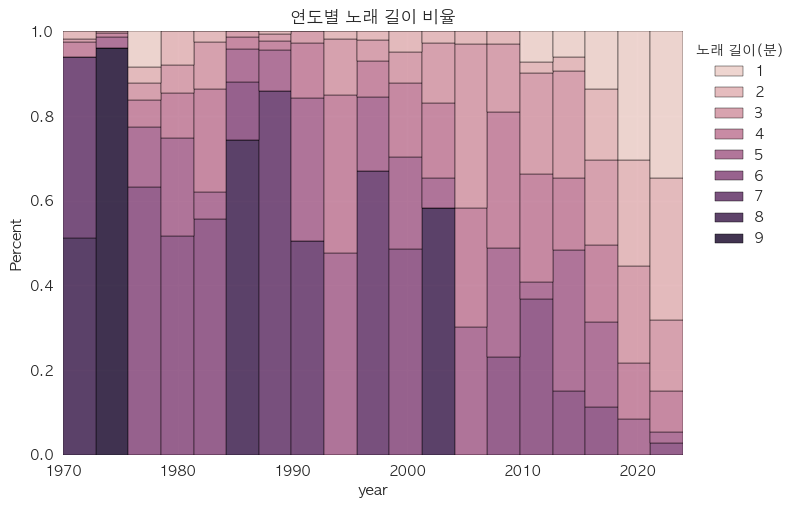

In [ ]:
liked = liked.drop(liked[liked[year] < 1970].index) ## 70년대 이전 데이터 제거

graph = sns.histplot(data = liked, x=year, hue=len, kde=False, stat="percent", 
             common_norm=False, multiple="fill", alpha=0.9) ## stat을 percent로, multiple을 fill로 변경

mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

move_legend(graph, loc="best", bbox_to_anchor=(1,1))

plt.title("연도별 노래 길이 비율")
leg = graph.get_legend()
leg.set_title("노래 길이(분)")

plt.show()

### 평균
### 장르 이슈(ex.클래식): 데이터 오염
### 라인 차트

---


# 4. 결론
## 최종 검증
데이터에 오염이 있따.




## 아쉬운 점

1. 인기 점수 칼럼으로도 추가적인 타당성 확보하고 싶었는데 시간 내에 끝내지 못함.

2. 데이터의 양 자체가 많지 않고 최근에 쏠려 있어서 데이터의 완성도에 확신을 가지기 어렵다.
